In [39]:
import pandas as pd
import scipy.stats as st
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import accuracy_score
from joblib import dump, load
from sklearn import tree
import math
import random
%matplotlib inline

In [40]:
# load data
df = pd.read_csv('health care diabetes.csv')
df

X = df['Glucose']
y = df['Outcome']

In [41]:
X_adjusted = []
y_adjusted = []

# X.size == y.size
# If glucose level < 54 mg/dL then you're probably dead
for i in range(0, X.size):
    if X[i] >= 54 and (y[i] == 0 or y[i] == 1):
        X_adjusted.append(X[i])
        y_adjusted.append(y[i])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X_adjusted).reshape(-1, 1), y_adjusted, test_size=0.25)
print(f"X train: {X_train}\n")
print(f"X test: {X_test}\n")
print(f"y train: {y_train}\n")
print(f"y test: {y_test}\n")

model = LogisticRegression()
model.fit(X_train, y_train)
print(f"Accuracy: {model.score(X_test, y_test)}")

X train: [[112]
 [133]
 [194]
 [ 99]
 [128]
 [126]
 [ 81]
 [ 95]
 [ 73]
 [104]
 [146]
 [139]
 [141]
 [183]
 [139]
 [162]
 [141]
 [105]
 [118]
 [162]
 [ 78]
 [166]
 [125]
 [106]
 [142]
 [ 90]
 [ 73]
 [112]
 [156]
 [ 81]
 [122]
 [110]
 [134]
 [121]
 [ 82]
 [ 99]
 [137]
 [ 97]
 [121]
 [162]
 [114]
 [100]
 [111]
 [106]
 [ 83]
 [ 92]
 [146]
 [111]
 [197]
 [179]
 [106]
 [138]
 [ 80]
 [107]
 [ 86]
 [123]
 [146]
 [115]
 [ 75]
 [110]
 [108]
 [140]
 [158]
 [146]
 [112]
 [ 87]
 [167]
 [ 87]
 [133]
 [144]
 [141]
 [ 89]
 [ 84]
 [106]
 [114]
 [ 88]
 [115]
 [106]
 [132]
 [126]
 [163]
 [179]
 [120]
 [109]
 [ 80]
 [ 91]
 [156]
 [119]
 [117]
 [ 91]
 [115]
 [ 87]
 [138]
 [ 99]
 [170]
 [124]
 [180]
 [118]
 [ 85]
 [106]
 [129]
 [114]
 [131]
 [ 99]
 [189]
 [ 92]
 [ 90]
 [119]
 [108]
 [137]
 [109]
 [125]
 [127]
 [141]
 [176]
 [142]
 [ 87]
 [102]
 [104]
 [173]
 [121]
 [ 71]
 [183]
 [115]
 [103]
 [114]
 [100]
 [180]
 [108]
 [133]
 [145]
 [112]
 [121]
 [119]
 [143]
 [144]
 [113]
 [132]
 [ 88]
 [147]
 [ 99]
 [16

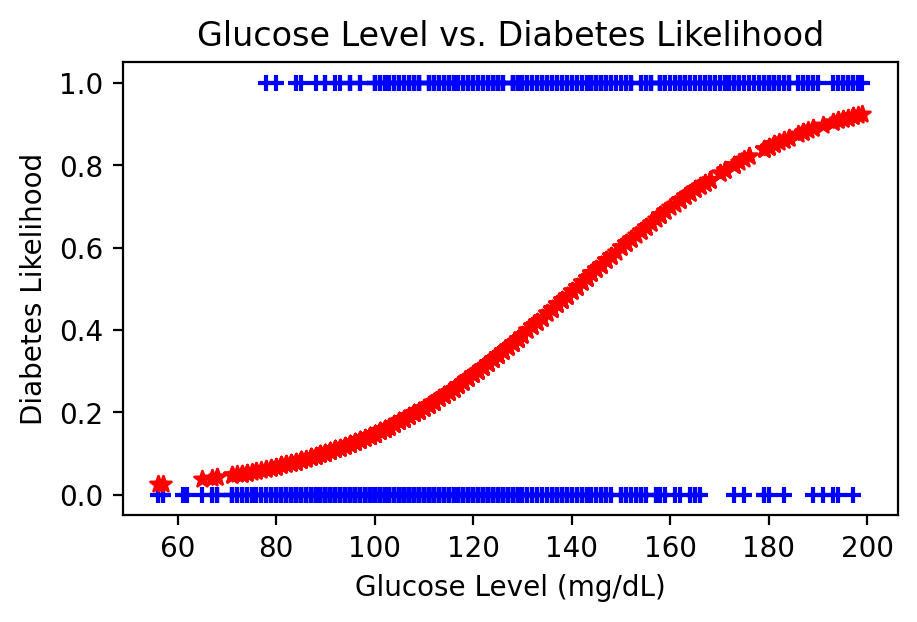

In [43]:
plt.figure(figsize=(5, 3), dpi=200)
plt.scatter(X_adjusted, y_adjusted, marker='+', color='blue')
plt.scatter(X_train, model.predict_proba(X_train)[:,1], marker="*",color='red')
plt.xlabel('Glucose Level (mg/dL)')
plt.ylabel('Diabetes Likelihood')
plt.title('Glucose Level vs. Diabetes Likelihood')
plt.show()

In [44]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [96]:
clusters = [] # stores x values of data
m_init = 1
b_init = 0
learning_rate = 0.01 # default
points = []

def sigmoid_function(x, m, b):
    return 1/(1 + math.exp(-1 * (m * x + b)))
              
# optimize model using stochastic gradient descent
    
def stochastic_gradient_descent(m, b):
    print("Performing SGD on selected cluster points")
    cluster_points()
    random_cluster_points()
    m_new = m_init
    b_new = b_init
    for point in points:
        y = sigmoid_function(point, m_new, b_new)
        
        adjusted_m = derivative_m(point, y, m_new, b_new)
        adjusted_b = derivative_b(point, y, m_new, b_new)
        
        print(adjusted_m)
        print(adjusted_b)
        
        m_init = m_new - adjusted_m * learning_rate
        b_init = b_new - adjusted_b * learning_rate
        print(m_init)
        print(b_init)
        

def cluster_points():
    # increment by some x and use a circle with radius x/2 to capture points
    # TODO: remove empty entries
    print("Clustering points")
    increment = 10 # diameter of circle
    start = min(X_adjusted)
    end = max(X_adjusted)
    # (x - h)^2 + (y - k)^2 <= r^2
    radius = increment/2
    X_center = increment/2
    y_center = sigmoid_function(X_center, m_init, b_init)
    
    for i in range(start, end, increment):
        temp = []
        for j in range(start, end):
            if ((X_adjusted[j] - X_center)**2 + (y_adjusted[j] - y_center)**2) <= (radius)**2:
                temp.append(X_adjusted[j])
            
        clusters.append(temp)
        
        X_center = X_center + increment
        y_center = sigmoid_function(X_center, m_init, b_init)
        print(f"{X_center}, {y_center}")
    
    print(clusters)
    
def remove_duplicates():
    temp = dict()
    for i in range(0, len(clusters)):
        for j in range(0, len(clusters[i])):
            if clusters[j] not in temp.keys():
                
        
    
def random_cluster_points(): # empty range for randrange() (0,0,0)
    print("Selecting a random point per cluster")
    for cluster in clusters:
        if cluster is not None:
            if len(cluster) > 1:
                i = random.randint(0, len(cluster)-1)
                points.append(cluster[i])
            else:
                points.append(cluster[0])

    print(points)
    
def calibration_process():
    stochastic_gradient_descent(m_init, b_init)
    print(f"Accuracy: {model.score(X_test, y_test)}")
    

# partial derivative of loss function with respect to slope
def derivative_m(x, y, m, b):
    return (-2*x)*(y-(b+m*x))
    
    
# partial derivative of loss function with respect to y-intercept
def derivative_b(x, y, m, b):
    return -2*(y-(b+m*x))

In [97]:
calibration_process()

Performing SGD on selected cluster points
Clustering points
15.0, 0.999999694097773
25.0, 0.999999999986112
35.0, 0.9999999999999993
45.0, 1.0
55.0, 1.0
65.0, 1.0
75.0, 1.0
85.0, 1.0
95.0, 1.0
105.0, 1.0
115.0, 1.0
125.0, 1.0
135.0, 1.0
145.0, 1.0
155.0, 1.0
[[], [], [], [], [], [57], [62], [79, 74, 71, 76, 78, 79, 75, 73], [84, 83, 81, 81, 85, 83, 89, 88, 84, 88, 87, 85, 87, 85], [99, 95, 100, 95, 92, 93, 96, 95, 97, 99, 96, 93, 99], [105, 109, 109, 100, 101, 106, 107, 107, 105, 105, 106, 108, 108, 102, 106, 109, 102, 104, 102, 109, 105, 107, 109], [114, 112, 113, 111, 113, 118, 117, 114, 114, 111, 119, 111, 113], [126, 129, 123, 122, 125, 126, 124, 122, 125, 129, 128, 129, 130, 128, 123], [133, 139, 131, 137, 136, 134, 132, 136, 131, 134, 130, 139, 135, 138], [146, 141, 146, 142, 144, 144, 146, 147, 148, 143, 141, 148]]
Selecting a random point per cluster


IndexError: list index out of range

In [91]:
model = dtc()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
dump(model, 'CHD.joblib')
model = load('CHD.joblib')